# Análise de Dados Airbnb               


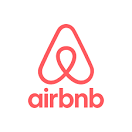

O Airbnb já é considerado como sendo a maior empresa hoteleira da atualidade.

A empresa não possui qualquer ativo imobiliário, é apenas uma intermediária que conecta pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis através de uma plataforma inovadora reconhecidamente confiável.


Analisando Airbnb
Neste notebook, iremos analisar os dados referentes à cidade e ver quais insights podem ser extraídos a partir de dados brutos.

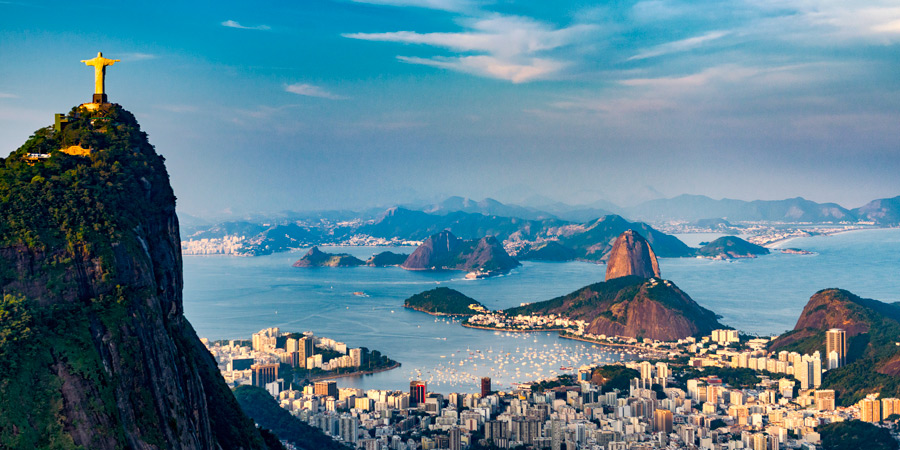

# 0.0 IMPORTS

In [1]:
import warnings

import folium
import branca
import pandas      as pd
import numpy       as np
import seaborn     as sns


import matplotlib.pyplot as plt


from IPython.core.display    import HTML
%matplotlib inline
warnings.filterwarnings( 'ignore' )

## 0.1 Obtendo os dados

Todos os dados usados aqui foram obtidos a partir do site Inside Airbnb.

Além dos dados, é necessário fazer a importação de bibliotecas para o nosso notebook.

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

listings.csv - Summary information and metrics for listings in Rio de Janeiro (good for visualisations).

## 0.2 Loading Data

In [2]:
df = pd.read_csv('C:/Users/PC/SejaUmDataScientist\DS_Classificacao/airbnb_project/Data/airbnb_rj.csv', low_memory=True)

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,350,5,272,2022-04-23,1.87,1,311,8,NaN
1,556930647599893392,Venha passar uma pernoite em um veleiro na Urca!,198206849,Andréia,NaN,Urca,-22.94781,-43.16351,Private room,280,1,1,2022-02-19,0.25,1,365,1,NaN
2,1174007,100% Best View In Copa In Suite 2,3962758,Thiago Luiz,NaN,Copacabana,-22.97277,-43.17966,Private room,107,2,177,2022-06-07,1.69,6,357,29,NaN
3,8410797,Ipanema(Arpoador) 100mdo Mar/ Jan & Carnaval +Fev,42038091,Sheila,NaN,Ipanema,-22.98871,-43.19334,Private room,1000,3,1,2017-09-28,0.02,3,362,0,NaN
4,28053241,Navegar a Bordo de um Veleiro Francês no Rio!,193860988,Luciano,NaN,Urca,-22.95056,-43.17175,Private room,1850,2,0,NaN,NaN,1,180,0,NaN


   #  Análise dos Dados

Análise dos Dados
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

Dicionário das variáveis

id - número de id gerado para identificar o imóvel

name - nome da propriedade anunciada

host_id - número de id do proprietário (anfitrião) da propriedade

host_name - Nome do anfitrião

neighbourhood_group - esta coluna não contém nenhum valor válido

neighbourhood - nome do bairro

latitude - coordenada da latitude da propriedade

longitude - coordenada da longitude da propriedade

room_type - informa o tipo de quarto que é oferecido

price - preço para alugar o imóvel

minimum_nights - quantidade mínima de noites para reservar

number_of_reviews - número de reviews que a propriedade possui

last_review - data do último review

reviews_per_month - quantidade de reviews por mês

calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião

availability_365 - número de dias de disponibilidade dentro de 365 dias

number_of_reviews_ltm – Quantidade de avaliação nos últimos 12 meses.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso dataset, analisando as 5 primeiras entradas.

In [3]:
df1 = df.drop(['license'], axis=1)

## Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?

In [5]:
#Identificado o volume de dados
print(f'Número de linhas é igual a: {df1.shape[0]}')
print(f'Número de colunas é igual a: {df1.shape[1]}')

# verificar as 5 primeiras entradas do dataset
df1.dtypes


Número de linhas é igual a: 24881
Número de colunas é igual a: 17


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

Esta é uma versão com dados resumidos. Na mesma página que baixamos o arquivo listings.csv. Há uma versão mais completa (listings.csv.gz).

Para esse dataset, temos que:

Entradas: 20428
Variáveis: 16

## Q2. Qual a porcentagem de valores ausentes no dataset?

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df1.isnull().sum() / df1.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
reviews_per_month                 0.308187
last_review                       0.308187
host_name                         0.004702
name                              0.000844
id                                0.000000
minimum_nights                    0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
room_type                         0.000000
price                             0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
number_of_reviews_ltm             0.000000
dtype: float64

Os dados do Rio de Janeiro não apresentam valores na coluna do neighbourhood.group, mas isso não será problema, basta inserir eles utilizando uma condição que relacionará o nome do bairro com a zona na qual fica.

In [7]:
zona_sul = ['Botafogo', 'Catete', 'Copacabana', 'Cosme Velho', 'Flamengo', 'Gávea', 'Glória', 'Humaitá', 'Ipanema','Jardim Botânico', 'Lagoa', 'Laranjeiras', 'Leblon', 'Leme', 'São Conrado', 'Urca', 'Vidigal', 'Rocinha']

zona_norte = ['Alto da Boa Vista', 'Andaraí', 'Grajaú', 'Maracanã', 'Praça da Bandeira', 'Tijuca', 'Vila Isabel', 'Água Santa', 'Cachambi', 'Del Castilho', 'Encantado', 'Engenho de Dentro', 'Engenho Novo', 

              'Higienópolis', 'Jacaré', 'Jacarezinho', 'Lins de Vasconcelos', 'Manguinhos', 'Maria da Graça', 'Méier', 'Piedade', 'Pilares', 'Riachuelo', 'Rocha', 'Sampaio', 'São Francisco Xavier', 'Todos os Santos', 

              'Bonsucesso', 'Bancários', 'Cacuia', 'Cidade Universitária', 'Cocotá', 'Galeão', 'Jardim Carioca', 'Jardim Guanabara', 'Maré', 'Moneró', 'Olaria', 'Pitangueiras', 'Portuguesa', 'Praia da Bandeira', 

              'Ramos', 'Ribeira', 'Tauá', 'Zumbi', 'Acari', 'Anchieta','Barros Filho', 'Bento Ribeiro', 'Brás de Pina', 'Campinho', 'Cavalcanti', 'Cascadura', 'Coelho Neto', 'Colégio', 'Complexo do Alemão', 'Cordovil', 

              'Costa Barros', 'Engenheiro Leal', 'Engenho da Rainha', 'Guadalupe', 'Honório Gurgel', 'Inhaúma', 'Irajá', 'Jardim América', 'Madureira', 'Marechal Hermes', 'Oswaldo Cruz', 'Parada de Lucas', 'Parque Anchieta', 

              'Parque Colúmbia', 'Pavuna', 'Penha', 'Penha Circular', 'Quintino Bocaiuva', 'Ricardo de Albuquerque', 'Rocha Miranda', 'Tomás Coelho', 'Turiaçu', 'Vaz Lobo', 'Vicente de Carvalho', 'Vigário Geral', 

              'Vila da Penha', 'Vila Kosmos', 'Vista Alegre', 'Freguesia (Ilha)']

zona_oeste = ['Anil', 'Barra da Tijuca', 'Camorim', 'Cidade de Deus', 'Curicica', 'Freguesia (Jacarepaguá)', 'Gardênia Azul', 'Grumari', 'Itanhangá', 'Jacarepaguá', 'Joá', 'Praça Seca', 'Pechincha', 'Rio das Pedras', 

               'Recreio dos Bandeirantes', 'Tanque', 'Taquara', 'Vargem Grande', 'Vargem Pequena', 'Vila Valqueire', 'Jardim Sulacap','Bangu', 'Campo dos Afonsos', 'Deodoro', 'Gericinó', 'Jabour', 'Magalhães Bastos', 

               'Padre Miguel', 'Realengo', 'Santíssimo', 'Senador Camará', 'Vila Kennedy', 'Vila Militar','Barra de Guaratiba', 'Campo Grande', 'Cosmos', 'Guaratiba', 'Inhoaíba', 'Paciência', 'Pedra de Guaratiba', 'Santa Cruz', 

               'Senador Vasconcelos', 'Sepetiba']

zona_centro = ['São Cristóvão', 'Benfica', 'Caju', 'Catumbi', 'Centro', 'Cidade Nova', 'Estácio', 'Gamboa', 'Lapa', 'Mangueira', 'Paquetá', 'Rio Comprido', 'Santa Teresa', 'Santo Cristo', 'Saúde', 'Vasco da Gama']

for s in zona_sul:

    df.neighbourhood_group = df.neighbourhood_group.mask(df.neighbourhood == s, 'Zona Sul')

for n in zona_norte:

    df.neighbourhood_group = df.neighbourhood_group.mask(df.neighbourhood == n, 'Zona Norte')

for o in zona_oeste:

    df.neighbourhood_group = df.neighbourhood_group.mask(df.neighbourhood == o, 'Zona Oeste')

for c in zona_centro:

    df.neighbourhood_group = df.neighbourhood_group.mask(df.neighbourhood == c, 'Centro')

df.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:10]


neighbourhood_group
Zona Oeste    898.884634
Centro        821.625578
Zona Sul      689.305051
Zona Norte    577.447368
Name: price, dtype: float64

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

- A variável neighbourhood_group tem 100% de missings, isso é todos os valores dos indivíduos são ausentes nessa variável.

- As variáveis reviews_per_month e last_review possuem 30%  de valores nulos.

- As variáveis name e host_name têm aproximadamente 0.04% dos valores nulos.

## Q3. Qual o tipo de distribuição das variáveis?

In [8]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'])

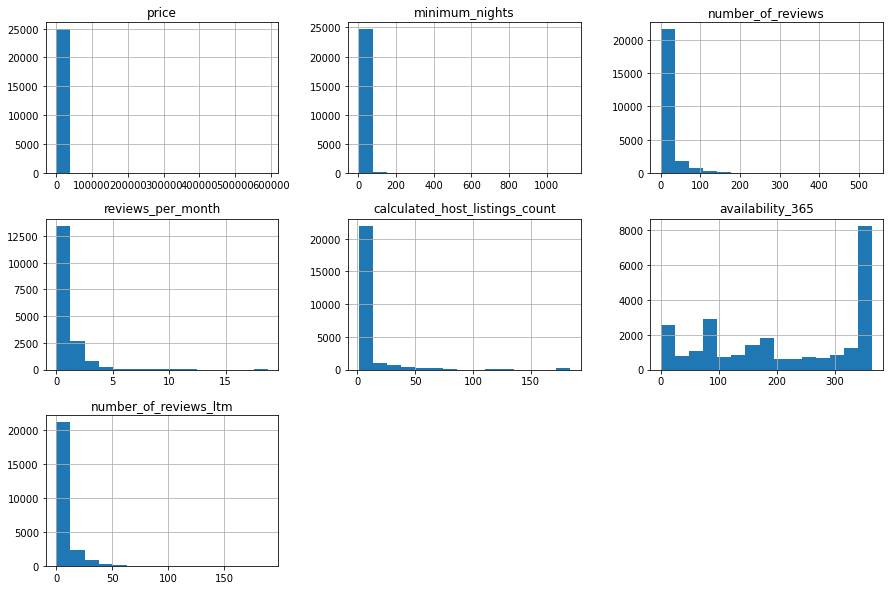

In [9]:
# plotar o histograma das variáveis númericas relevantes na análise
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].hist(bins = 15, figsize=[15,10]);

Analisando a distribuição das variáveis é possível perceber que:

A variável availability_365 que corresponde ao número de dias de disponibilidade dentro de 365 dias tem alguns picos na distribuição. O maior ocorre depois de 300 dias.


Pode-se concluir portanto que uma parte significativa das acomodações disponíveis no Rio de Janeiro pelo Airbnb estão disponíveis ou poucas vezes no ano, ou muitas vezes no ano. Isso pode indicar dois perfis de host o que disponilibiza apenas sazonalmente e o que disponibiliza com alta frequência acomodações.

Uma forma de compreender melhor esse fenômeno, seria analisar o mês de disponibilidade da acomodação. O host que disponibiliza sazonalmente o faz em quais meses? Nas férias escolares? Nos meses que tenham feriado prolongado?


## Q4. Presença de dados outliers


Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis price, minimum_nights e calculated_host_listings_count os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, iremos identificar por duas maneiras diferentes que auxiliam a detecção de outliers.

In [10]:
df1[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365','number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,24881.000000,24881.000000,24881.000000,17213.000000,24881.000000,24881.000000,24881.000000
mean,745.395884,5.358426,16.818818,0.812952,8.020297,214.774165,5.294964
std,4983.640074,26.044111,36.859241,1.011219,22.311380,131.693681,9.900060
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,180.000000,1.000000,0.000000,0.130000,1.000000,89.000000,0.000000
50%,300.000000,2.000000,3.000000,0.450000,1.000000,212.000000,1.000000
75%,600.000000,4.000000,15.000000,1.100000,4.000000,356.000000,6.000000
max,591723.000000,1125.000000,534.000000,18.740000,184.000000,365.000000,189.000000


No resumo estatístico podemos confirmar algumas hipóteses:

a variável price temos uma média de 745 unidades monetárias, mas vemos que 75% do total de dados estão abaixo de 600 unidades monetárias e o máximo está em 591723.

em minimun_nights temos um máximo de 24881, sabemos que a variável é a quantidade minima de noites para reservar, isso ultrapassa a quantidade de dias de ano.

Para evidenciar os outliers por meio de gráfico, vamos plotar em um boxplot essas duas variáveis.

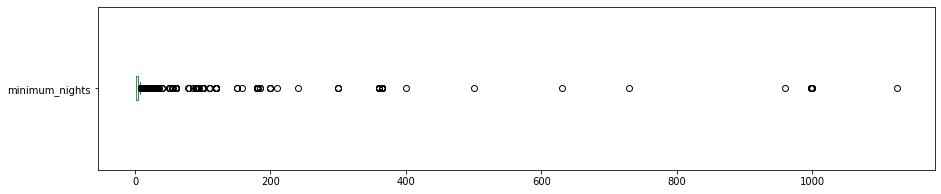

minimum_nights: valores acima de 30:
275 entradas
1.11%


In [11]:
# minimum_nights
df1.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df1[df1.minimum_nights > 30])))
print("{:.2f}%".format((len(df1[df1.minimum_nights > 30]) / df1.shape[0])*100))

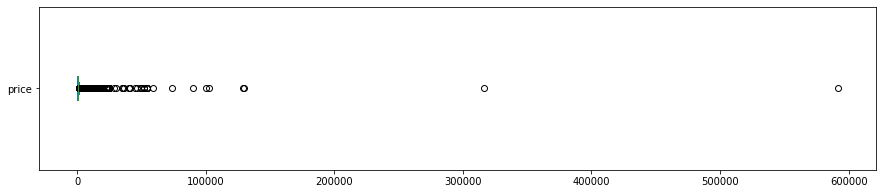


price: valores acima de 1500
1830 entradas
7.36%


In [12]:
# price
df1.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df1[df1.price > 1500])))
print("{:.2f}%".format((len(df1[df1.price > 1500]) / df1.shape[0])*100))

Portanto, temos que, para a variável minimun_nights a quantidade de registros acima de 30 dias são 1.11% do total de dados e assim vamos remover os dados acima desse valor.

Para a variável price, a quantidade de registros acima de 1500 são 7.36% do total de dados e vamos remover os dados acima desse valor.

**Histograma sem os dados outliers**

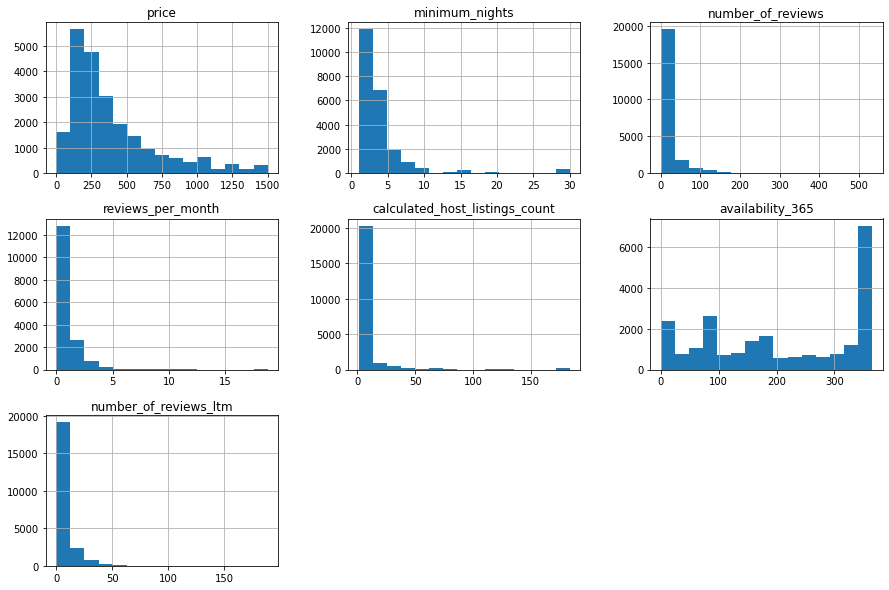

In [13]:
## remover os outliers do nosso dataset

df_clean = df1.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# Como a variável `neighbourhood_group` está vazia, vamos remover também.
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

## plotando novamente o histograma agora com os dados limpos
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].hist(bins = 15, figsize = [15,10]);

## Q5. Qual a correlação existente entre as variáveis

Vamos verificar o qual é o valor entre a relação de uma variável com todas as outras, nesse caso, queremos buscar uma relação de semelhança entre duas váriaveis.

Para tal, vamos criar uma matriz de correlação e após isso vamos visualizar graficamente por meio de um heatmap.

In [14]:
## criar uma matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,0.106835,-0.167250,-0.179363,0.084582,0.134122,-0.205602
minimum_nights,0.106835,1.000000,-0.072592,-0.146840,-0.052652,-0.010835,-0.131919
number_of_reviews,-0.167250,-0.072592,1.000000,0.507833,-0.046796,-0.132774,0.693603
reviews_per_month,-0.179363,-0.146840,0.507833,1.000000,0.009458,-0.097283,0.768856
calculated_host_listings_count,0.084582,-0.052652,-0.046796,0.009458,1.000000,-0.004639,-0.011045
availability_365,0.134122,-0.010835,-0.132774,-0.097283,-0.004639,1.000000,-0.144399
number_of_reviews_ltm,-0.205602,-0.131919,0.693603,0.768856,-0.011045,-0.144399,1.000000


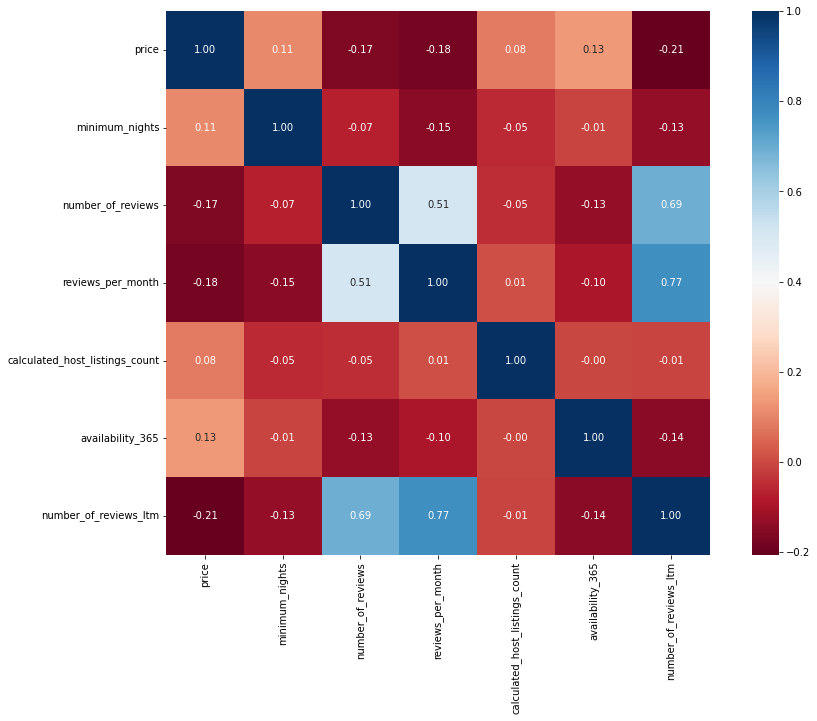

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

A matriz de correlações pode ser dividida em duas partes. A linha central em azul representa a correlação da variável consigo mesma, e por isso tem valor 1 (correlação perfeita). Os valores abaixo da linha azul e acima são espelhados, isto é, os mesmos valores que encontramos abaixo da linha azul, também estão acima.


É possível perceber que as variáveis number of reviews (número de avaliações) e reviews per month (avaliações por mês) são positiva e altamente correlacionadas. Essa correlação faz muito sentido uma vez que quanto mais avaliações um host recebe por mês, mais avaliações ele terá ao final.

Além disso, as variáveis price e minimum nights também são positivamente correlacionadas indicando que quanto maior o número de mínimo de noites para fazer a reserva maior o preço cobrado, o que também é uma associação que faz sentido.

As variáveis number of reviews e reviews per month são negativamente correlacionadas com a variável price. Indicando que quanto maior o preço menor o número de avaliações e avaliações mensais. Essa correlação é curiosa e poderia estar associada a outros fatores como disponibilidade da acomodação. Isto é, como a acomodação fica disponível poucos dias no ano ela tem poucas avaliações porém seu preço é elevado em relação aos demais justamente por estar pouco disponível. Essa é uma possibilidade de análise.


## Q6. Qual o tipo de imóvel  mais alugado no Airbnb?

Em nosso dataset temos a coluna room_type, que mostra para nós o tipo de locação que está sendo anunciada no AirBnb.

Existem as seguintes opções de alguel: 
- apartamentos/casas inteiras, 
- aluguel de um quarto, 
- dividir o quarto com outras pessoas 
- alugar um quarto de hotel.

Vamos analisar a frequência com que cada tipo de acomodação é locada:

In [16]:
# mostrar a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()

Entire home/apt    17252
Private room        5061
Shared room          436
Hotel room            62
Name: room_type, dtype: int64

In [17]:
# Porcentagem de cada um desses tipos de imóvel disponível

(df_clean.room_type.value_counts() / df_clean.shape[0]) * 100

Entire home/apt    75.630178
Private room       22.186664
Shared room         1.911359
Hotel room          0.271799
Name: room_type, dtype: float64

É possível perceber então que quase 75% das locações são de apartamentos/casas inteiras, enquanto 22% são de quartos particulares e apenas 2% de quartos compartilhados.

## Qual a localidade mais cara do Rio de Janeiro?

Entender a importância da localização na valorização do imóvel é um fator que contribui muito na recorrência do aluguel e o quanto ele é lucrativo. Para especialistas imobiliários, o valor de um imóvel está ligado a:

Infraestrutura do bairro.
Tamanho do imóvel.
Segurança.
Conveniências próximas.


Os dados disponíveis do Airbnb contém a localização por bairro dos imóveis disponíveis, vamos considerar essa dimensão de análise porém a partir do preço de locação.

In [18]:
df_clean.groupby(['neighbourhood']).price.sum().sort_values(ascending=False)[:10]/ df_clean.shape[0]

neighbourhood
Copacabana                  107.093113
Ipanema                      49.556398
Barra da Tijuca              44.621805
Leblon                       24.930165
Recreio dos Bandeirantes     20.483319
Jacarepaguá                  19.621016
Botafogo                     14.244137
Santa Teresa                  9.971417
Leme                          7.345097
Centro                        6.869931
Name: price, dtype: float64

O Rio de Janeiro é uma cidade turística, e quando avaliamos quais os bairros mais caros, percebemos que os mais famosos, como Copacabana, Ipanema, Barra da Tijuca e Lebron estão no topo da lista.

In [19]:
# ver a quantidade de imóveis para Copacabana
bairro = "Copacabana"
df_clean[df_clean.neighbourhood == bairro].count()

id                                6992
name                              6991
host_id                           6992
host_name                         6931
neighbourhood                     6992
latitude                          6992
longitude                         6992
room_type                         6992
price                             6992
minimum_nights                    6992
number_of_reviews                 6992
last_review                       5565
reviews_per_month                 5565
calculated_host_listings_count    6992
availability_365                  6992
number_of_reviews_ltm             6992
dtype: int64

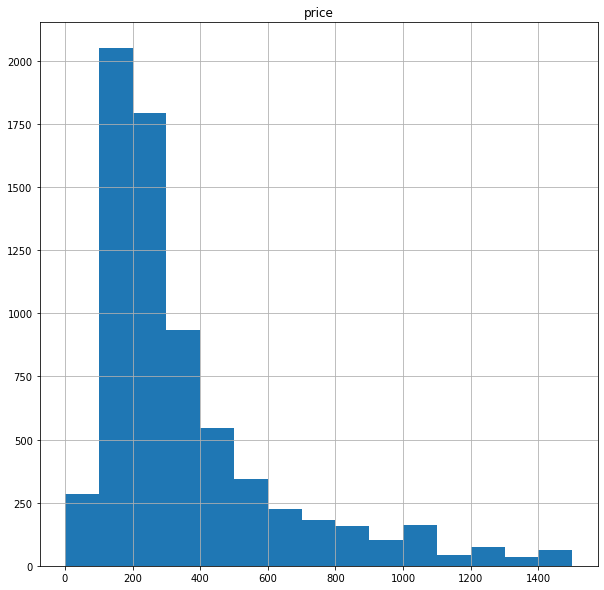

In [25]:
df_clean[['price']][df_clean.neighbourhood == bairro].hist(bins = 15, figsize = [10,10]);

## Localização dos imóveis no mapa

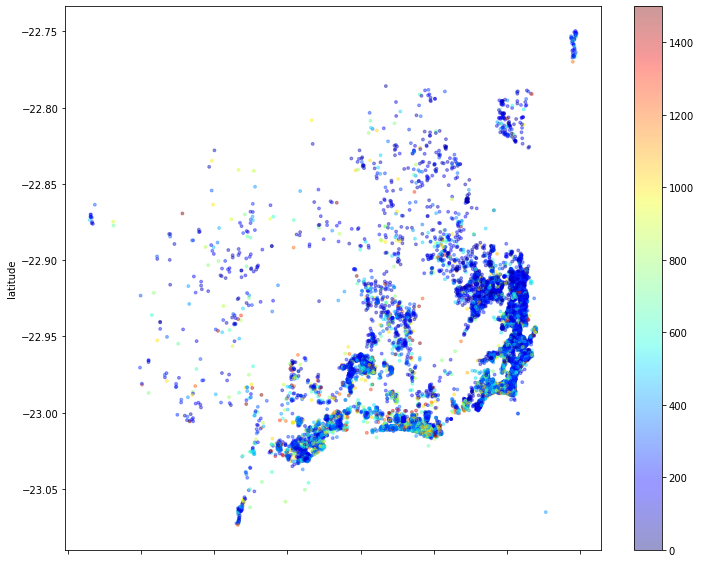

In [21]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,10));

Um fator interessante no mapa, é que os imóveis mais próximos das praias são os que aparentam ter maior preço médio, principalmente comparado a zona norte e centro.

In [22]:
## Criado um dataframe com os cinco maiores locadores, devemos agrupar por host_id pois podemos ter nomes iguais, mas IDs diferentes.
df_top5_locadores = pd.DataFrame(df_clean.groupby(['host_id', 'host_name']).size().sort_values(ascending = False).head(5))
df_top5_locadores

,,0
host_id,host_name,
91654021,Daniel,159
371026651,Pineapples,124
1982737,Estadia,82
47584281,Renato,71
74463624,Mozart,65


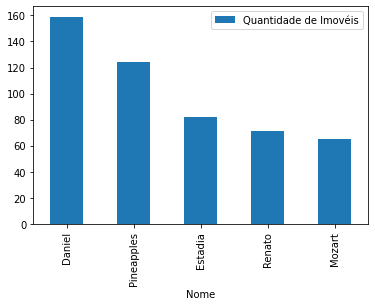

In [23]:
## foi criado um MultiIndex, vamos transformar o MultiIndex em duas colunas para o nosso DataFrame e após isso vamos retirar o ID, não será mais necessário.
## Assim podemos renomear os nomes das nossas colunas
## Vamos visualizar em forma de gráfico de barras a quantidade de imóveis
df_top5_locadores.reset_index(level=['host_id','host_name'], inplace=True);
df_top5_locadores = df_top5_locadores.drop(['host_id'], axis=1);
df_top5_locadores.columns = ['Nome','Quantidade de Imovéis']
df_top5_locadores.plot(kind = 'bar', x= 'Nome');

Com o resultado acima, podemos ver que o anfritrião Daniel e o pineapples tem as maiores quantidade de imóveis disponiveís no Rio de Janeiro no AirBnb.




**Conclusões**

A análise acima foi feita com um dataset resumido disponibilizado pela própria Airbnb, mas podemos identificar que:

Além disso encontramos uma correlação positiva entre as variáveis número de avaliações e avaliações por mês. Bem como entre as variáveis preço e mínimo de noites, isto é, quanto maior o número mínimo de noites para fazer a reserva maior o preço cobrado.

A quantidade de valores ausentes é uma porcentagem pequena, podemos trabalhar com os dados após a retirada dos nulos.

Em uma análise posterior poderiamos ver quais os tipos de aluguel que os dois alugam, qual é o valor médio de hospedagem e as localidades dos seus imóveis.
